In [19]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle
from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_csv('../data/wine_quality_modelos2.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,baja
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,baja
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,baja
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,media
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,media
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,baja
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,media
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,media


In [3]:
# desordenamos la columna del tipo de vino para que no vaya en orden
df['wine_type'] = np.random.permutation(df['wine_type'].values)
df.to_csv('../data/wine_quality_modelos2.csv')
df

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,white,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,baja
1,white,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,baja
2,white,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,baja
3,white,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,media
4,white,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,media
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,baja
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,media
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,media


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_type             6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  quality_category      6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


In [20]:
# Separamos las features de las etiquetas 
# X = df[['fixed acidity','volatile acidity','citric acid','residual sugar', 
        #'chlorides', 'total sulfur dioxide', 'density', 'pH','sulphates','alcohol']]
X = df[['volatile acidity','total sulfur dioxide', 'density', 'pH','alcohol']]
y = df["quality_category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5197, 5)
(5197,)
(1300, 5)
(1300,)


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# MODELO LOGISTIC REGRESSION

In [22]:
modelo_lr = LogisticRegression(
    max_iter=1000,  # Aumentar iteraciones para convergencia
    random_state=10,
    class_weight='balanced',
    multi_class='auto'  # Auto-detecta si es binario o multiclase
)
modelo_lr.fit(X_train_scaled, y_train)

c:\Users\amaci\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='auto',
                   random_state=10)

In [23]:
y_pred = modelo_lr.predict(X_test_scaled)
y_proba = modelo_lr.predict_proba(X_test_scaled)  # Probabilidades para todas las clases

In [24]:
# 1. Métricas básicas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred, average='macro'))
accu_lr=accuracy_score(y_test, y_pred)

# 2. Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
cm_lr = confusion_matrix(y_test, y_pred)

# 3. Reporte completo (precision, recall, f1 por clase)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 4. ROC-AUC (para multiclase)
if len(modelo_lr.classes_) > 2:
    y_test_bin = pd.get_dummies(y_test).values  # One-hot encoding
    roc_auc_lr=roc_auc_score(y_test_bin, y_proba, multi_class='ovr')
else:
    print("ROC-AUC (Binario):", roc_auc_score(y_test, y_proba[:, 1]))
roc_auc_lr

Accuracy: 0.5069230769230769
Precision (macro): 0.4706409014362902
Recall (macro): 0.608988570005703
F1-Score (macro): 0.4346675227414936

Matriz de Confusión:
[[ 30   1   9]
 [ 32 334 111]
 [278 210 295]]

Reporte de Clasificación:
              precision    recall  f1-score   support

        alta       0.09      0.75      0.16        40
        baja       0.61      0.70      0.65       477
       media       0.71      0.38      0.49       783

    accuracy                           0.51      1300
   macro avg       0.47      0.61      0.43      1300
weighted avg       0.66      0.51      0.54      1300



np.float64(0.7704415322927719)

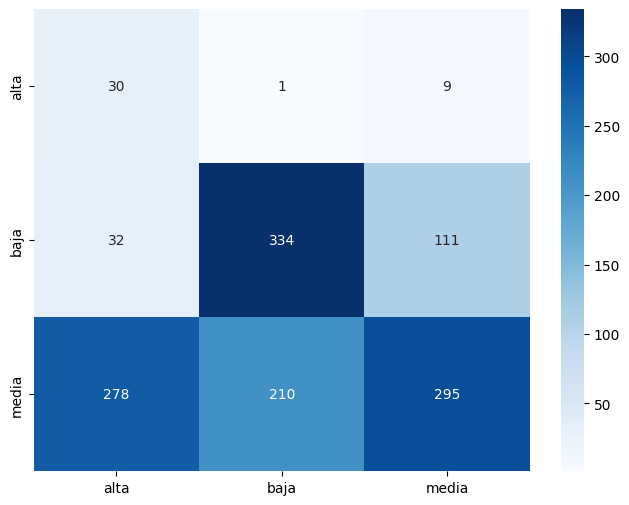

In [25]:
# Matriz de confusion
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    cm_lr, 
    annot=True, 
    fmt='d',          # 'd' = formato entero (sin decimales)
    cmap='Blues',     # Colores azules (puedes usar 'Reds', 'Greens', etc.)
    cbar=True,        # Muestra la barra de colores lateral
    xticklabels=['alta', 'baja', 'media'],  # Nombres de clases (¡ajústalos!)
    yticklabels=['alta', 'baja', 'media']   # Nombres de clases
)

In [12]:
y_test

6731      alta
4794     media
4005     media
1202      alta
1142     media
         ...  
6874      alta
1412     media
10857     baja
2728     media
4001     media
Name: quality_category, Length: 2349, dtype: object

In [13]:
y_test.value_counts()

quality_category
alta     783
media    783
baja     783
Name: count, dtype: int64

# MODELO RANDOM FOREST

In [26]:
modelo_rf = RandomForestClassifier(
    n_estimators=1000,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    oob_score=True,
    random_state=10)

modelo_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1000, oob_score=True, random_state=10)

In [27]:
y_pred_rf = modelo_rf.predict(X_test_scaled)
y_proba_rf = modelo_rf.predict_proba(X_test_scaled) 

In [28]:
# 1. Métricas básicas
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision (macro):", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_rf, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred_rf, average='macro'))
accu_rf=accuracy_score(y_test, y_pred_rf)

# 2. Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf)) 
cm_rf = confusion_matrix(y_test, y_pred_rf)

# 3. Reporte completo por clase
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

# 4. ROC-AUC (para multiclase)
if len(modelo_rf.classes_) > 2:
    y_test_bin = pd.get_dummies(y_test).values  # One-hot encoding
    roc_auc_rf=roc_auc_score(y_test_bin, y_proba_rf, multi_class='ovr')
else:
    print("ROC-AUC (Binario):", roc_auc_score(y_test, y_proba_rf[:, 1]))
roc_auc_rf

Accuracy: 0.7369230769230769
Precision (macro): 0.6188226332199546
Recall (macro): 0.626389390909018
F1-Score (macro): 0.6224622601789397

Matriz de Confusión:
[[ 16   0  24]
 [  1 337 139]
 [ 25 153 605]]

Reporte de Clasificación:
              precision    recall  f1-score   support

        alta       0.38      0.40      0.39        40
        baja       0.69      0.71      0.70       477
       media       0.79      0.77      0.78       783

    accuracy                           0.74      1300
   macro avg       0.62      0.63      0.62      1300
weighted avg       0.74      0.74      0.74      1300



np.float64(0.8440844719451794)

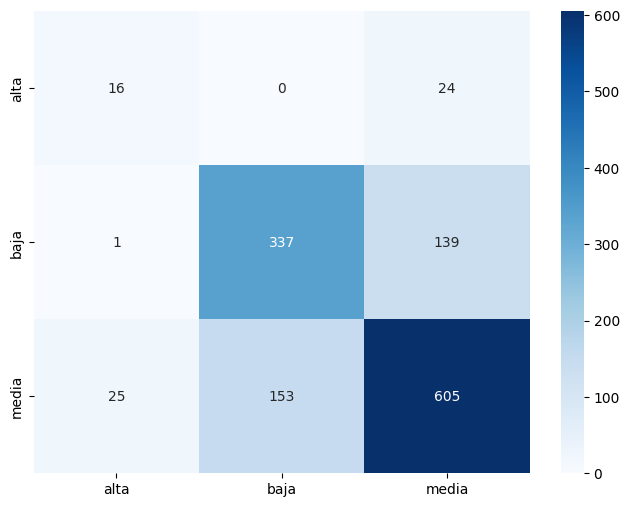

In [29]:
# Matriz de confusion
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    cm_rf, 
    annot=True, 
    fmt='d',          # 'd' = formato entero (sin decimales)
    cmap='Blues',     # Colores azules (puedes usar 'Reds', 'Greens', etc.)
    cbar=True,        # Muestra la barra de colores lateral
    xticklabels=['alta', 'baja', 'media'],  # Nombres de clases (¡ajústalos!)
    yticklabels=['alta', 'baja', 'media'] # Nombres de clases
)

# RANDOM FOREST CON GRIDSEARCH

In [32]:
rf = RandomForestClassifier()
parametros={
    "n_estimators":[50,100,150],
    "max_depth":[7,10,12],
    "max_features":[4,10],
    "bootstrap":[True, False],
    'class_weight': ['balanced', 'balanced_subsample'],
}

gs_rfc = GridSearchCV(rf, parametros, scoring="accuracy", cv = 5, verbose=3, n_jobs=1)
gs_rfc.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END bootstrap=True, class_weight=balanced, max_depth=7, max_features=4, n_estimators=50;, score=0.648 total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, max_depth=7, max_features=4, n_estimators=50;, score=0.668 total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, max_depth=7, max_features=4, n_estimators=50;, score=0.678 total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, max_depth=7, max_features=4, n_estimators=50;, score=0.654 total time=   0.3s
[CV 5/5] END bootstrap=True, class_weight=balanced, max_depth=7, max_features=4, n_estimators=50;, score=0.659 total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, max_depth=7, max_features=4, n_estimators=100;, score=0.649 total time=   0.7s
[CV 2/5] END bootstrap=True, class_weight=balanced, max_depth=7, max_features=4, n_estimators=100;, score=0.668 total time=   0.7s
[CV 3/5] END bootstrap=Tru

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [7, 10, 12], 'max_features': [4, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=3)

In [38]:
print(gs_rfc.best_estimator_)
print(gs_rfc.best_score_)

RandomForestClassifier(class_weight='balanced', max_depth=12, max_features=4,
                       n_estimators=150)
0.7594778633301251


In [39]:
modelo_rf_gs = RandomForestClassifier(
    n_estimators=150,
    max_depth=12,
    max_features=4,
    class_weight='balanced',
    random_state=10)

modelo_rf_gs.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, max_features=4,
                       n_estimators=150, random_state=10)

In [40]:
y_pred_rf_gs = modelo_rf_gs.predict(X_test_scaled)
y_proba_rf_gs = modelo_rf_gs.predict_proba(X_test_scaled) 

In [41]:
# 1. Métricas básicas
print("Accuracy:", accuracy_score(y_test, y_pred_rf_gs))
print("Precision (macro):", precision_score(y_test, y_pred_rf_gs, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_rf_gs, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred_rf_gs, average='macro'))
accu_rf_gs=accuracy_score(y_test, y_pred_rf_gs)

# 2. Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf_gs)) 
cm_rf_gs = confusion_matrix(y_test, y_pred_rf_gs)

# 3. Reporte completo por clase
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf_gs))

# 4. ROC-AUC (para multiclase)
if len(modelo_rf_gs.classes_) > 2:
    y_test_bin = pd.get_dummies(y_test).values  # One-hot encoding
    roc_auc_rf_gs=roc_auc_score(y_test_bin, y_proba_rf_gs, multi_class='ovr')
else:
    print("ROC-AUC (Binario):", roc_auc_score(y_test, y_proba_rf_gs[:, 1]))
roc_auc_rf_gs

Accuracy: 0.7830769230769231
Precision (macro): 0.7531795952143358
Recall (macro): 0.6211209908672498
F1-Score (macro): 0.6594337673508183

Matriz de Confusión:
[[ 12   0  28]
 [  0 340 137]
 [  5 112 666]]

Reporte de Clasificación:
              precision    recall  f1-score   support

        alta       0.71      0.30      0.42        40
        baja       0.75      0.71      0.73       477
       media       0.80      0.85      0.83       783

    accuracy                           0.78      1300
   macro avg       0.75      0.62      0.66      1300
weighted avg       0.78      0.78      0.78      1300



np.float64(0.8516650747925855)

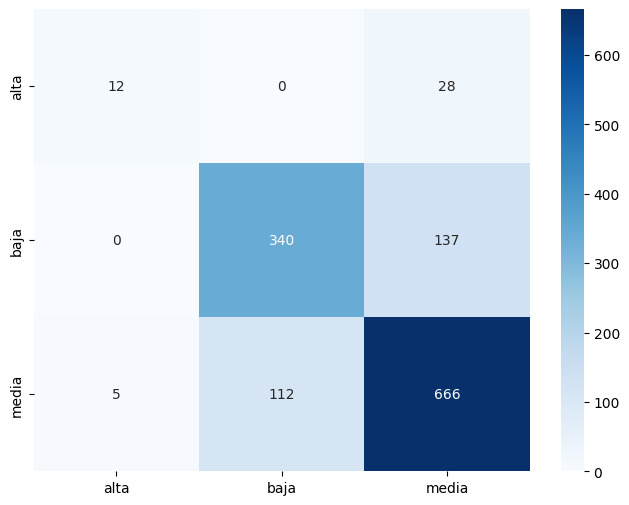

In [42]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap( 
    cm_rf_gs, 
    annot=True, 
    fmt='d',          # 'd' = formato entero (sin decimales)
    cmap='Blues',     # Colores azules (puedes usar 'Reds', 'Greens', etc.)
    cbar=True,        # Muestra la barra de colores lateral
    xticklabels=['alta', 'baja', 'media'],  # Nombres de clases (¡ajústalos!)
    yticklabels=['alta', 'baja', 'media'] # Nombres de clases
)

# MODELO ADABOOST

In [43]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [44]:
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(max_depth=12)
modelo_abc = AdaBoostClassifier(
    estimator=dt, 
    n_estimators=150, 
    learning_rate=0.5,
    random_state=10)
 
modelo_abc.fit(X_train_resampled, y_train_resampled)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=12),
                   learning_rate=0.5, n_estimators=150, random_state=10)

In [45]:
y_pred_abc = modelo_abc.predict(X_test_scaled)
y_proba_abc = modelo_abc.predict_proba(X_test_scaled) 

In [46]:
# 1. Métricas básicas
print("Accuracy:", accuracy_score(y_test, y_pred_abc))
print("Precision (macro):", precision_score(y_test, y_pred_abc, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_abc, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred_abc, average='macro'))
accu_abc=accuracy_score(y_test, y_pred_abc)

# 2. Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_abc)) 
cm_rf_abc = confusion_matrix(y_test, y_pred_abc)


# 4. Reporte completo por clase
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_abc))

# 4. ROC-AUC (para multiclase)
if len(modelo_abc.classes_) > 2:
    y_test_bin = pd.get_dummies(y_test).values  # One-hot encoding
    roc_auc_abc=roc_auc_score(y_test_bin, y_proba_abc, multi_class='ovr')
else:
    print("ROC-AUC (Binario):", roc_auc_score(y_test, y_proba_abc[:, 1]))
roc_auc_abc

Accuracy: 0.7876923076923077
Precision (macro): 0.6591430807170827
Recall (macro): 0.64140220246271
F1-Score (macro): 0.6495164662474845

Matriz de Confusión:
[[ 14   0  26]
 [  1 347 129]
 [ 21  99 663]]

Reporte de Clasificación:
              precision    recall  f1-score   support

        alta       0.39      0.35      0.37        40
        baja       0.78      0.73      0.75       477
       media       0.81      0.85      0.83       783

    accuracy                           0.79      1300
   macro avg       0.66      0.64      0.65      1300
weighted avg       0.79      0.79      0.79      1300



np.float64(0.8737852029204328)

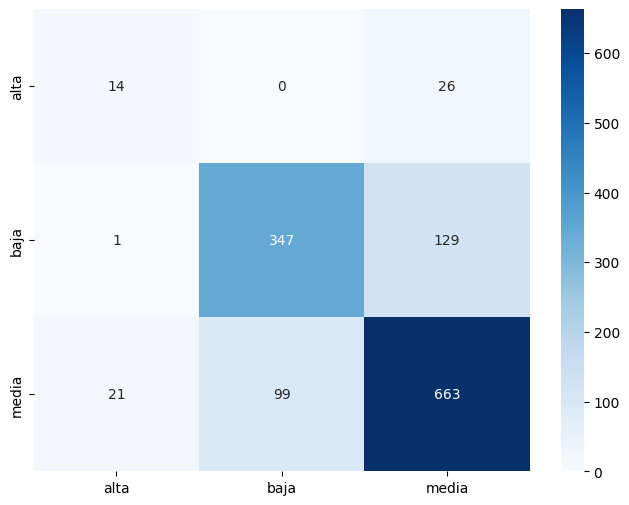

In [47]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    cm_rf_abc, 
    annot=True, 
    fmt='d',          # 'd' = formato entero (sin decimales)
    cmap='Blues',     # Colores azules (puedes usar 'Reds', 'Greens', etc.)
    cbar=True,        # Muestra la barra de colores lateral
    xticklabels=['alta', 'baja', 'media'],  # Nombres de clases (¡ajústalos!)
    yticklabels=['alta', 'baja', 'media'] # Nombres de clases
)

# MODELO XGBOOST

In [60]:
from sklearn.preprocessing import LabelEncoder

# Crear y ajustar el encoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Convierte ['alta', 'baja', 'media'] → [0, 1, 2]

# Aplicar el mismo encoder a y_test (si lo tienes)
y_test_encoded = le.transform(y_test)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train_encoded)

In [54]:
conteo = pd.Series(y_res).value_counts().sort_index()
conteo

quality_category
alta     3132
baja     3132
media    3132
Name: count, dtype: int64

In [61]:
from xgboost import XGBClassifier

modelo_xgb = XGBClassifier(
    n_estimators = 1000, 
    random_state = 10, 
    learning_rate = 0.5,
    objective='multi:softmax',  # Necesario para multiclase
    num_class=3)

modelo_xgb.fit(X_res, y_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_class=3, ...)

In [62]:
y_pred_encoded = modelo_xgb.predict(X_test_scaled)
y_pred_xgb= le.inverse_transform(y_pred_encoded) 
y_proba_xgb = modelo_xgb.predict_proba(X_test_scaled) 

In [63]:
# 1. Métricas básicas
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision (macro):", precision_score(y_test, y_pred_xgb, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_xgb, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred_xgb, average='macro'))
accu_xgb=accuracy_score(y_test, y_pred_xgb)

# 2. Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_xgb)) 
cm_rf_xgb = confusion_matrix(y_test, y_pred_xgb)

# 4. Reporte completo por clase
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_xgb))

# 4. ROC-AUC (para multiclase)
if len(modelo_xgb.classes_) > 2:
    y_test_bin = pd.get_dummies(y_test).values  # One-hot encoding
    roc_auc_xgb = roc_auc_score(y_test_bin, y_proba_xgb, multi_class='ovr')
else:
    print("ROC-AUC (Binario):", roc_auc_score(y_test, y_proba_xgb[:, 1]))
roc_auc_xgb

Accuracy: 0.7561538461538462
Precision (macro): 0.6292633292633293
Recall (macro): 0.6116707631509193
F1-Score (macro): 0.6197423276189552

Matriz de Confusión:
[[ 13   2  25]
 [  0 331 146]
 [ 22 122 639]]

Reporte de Clasificación:
              precision    recall  f1-score   support

        alta       0.37      0.33      0.35        40
        baja       0.73      0.69      0.71       477
       media       0.79      0.82      0.80       783

    accuracy                           0.76      1300
   macro avg       0.63      0.61      0.62      1300
weighted avg       0.75      0.76      0.75      1300



np.float64(0.8368389508113315)

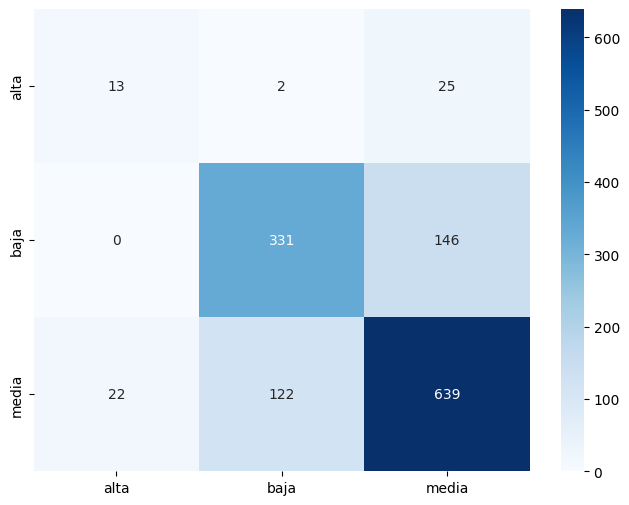

In [64]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    cm_rf_xgb, 
    annot=True, 
    fmt='d',          # 'd' = formato entero (sin decimales)
    cmap='Blues',     # Colores azules (puedes usar 'Reds', 'Greens', etc.)
    cbar=True,        # Muestra la barra de colores lateral
    xticklabels=['alta', 'baja', 'media'],  # Nombres de clases (¡ajústalos!)
    yticklabels=['alta', 'baja', 'media'] # Nombres de clases
)

# COMPARAMOS

In [65]:
roc_auc_values = [roc_auc_lr, roc_auc_rf, roc_auc_rf_gs, roc_auc_abc, roc_auc_xgb]  
accuracy_values = [accu_lr, accu_rf, accu_rf_gs, accu_abc, accu_xgb]  

df_resultados = pd.DataFrame({'ROC AUC': roc_auc_values,'ACCURACY': accuracy_values}, 
                             index=[
                                 'LogisticRegression',
                                 'RandomForestClassifier',
                                 'RandomForestClassifier_GS',
                                 'AdaBoostClassifier',
                                 'XGBClassifier']
                             )

df_resultados = df_resultados.sort_values('ROC AUC', ascending=False)
print(df_resultados)

                            ROC AUC  ACCURACY
AdaBoostClassifier         0.873785  0.787692
RandomForestClassifier_GS  0.851665  0.783077
RandomForestClassifier     0.844084  0.736923
XGBClassifier              0.836839  0.756154
LogisticRegression         0.770442  0.506923


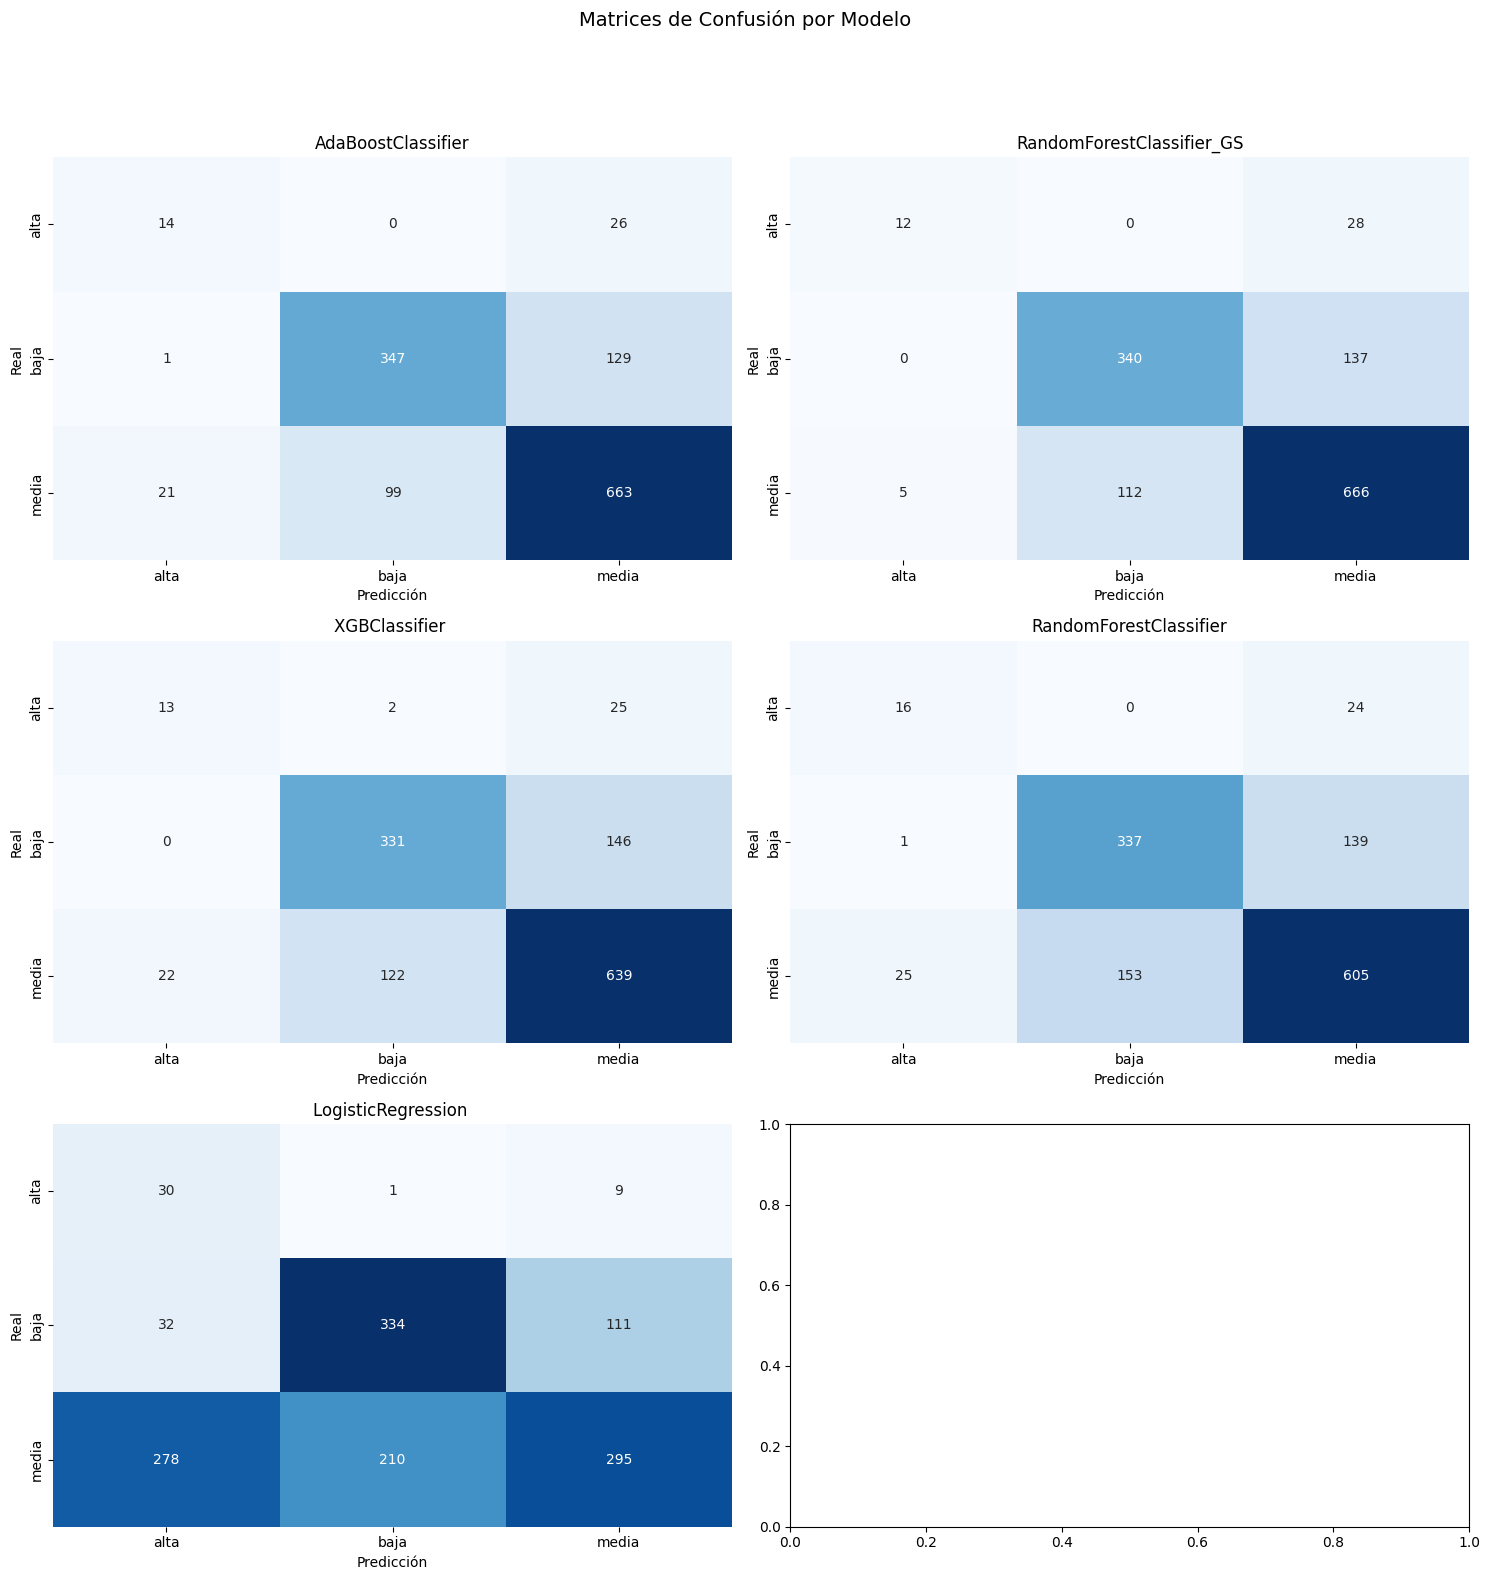

In [66]:
cm_lr = confusion_matrix(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf_gs = confusion_matrix(y_test, y_pred_rf_gs)
cm_rf_abc = confusion_matrix(y_test, y_pred_abc)
cm_rf_xgb = confusion_matrix(y_test, y_pred_xgb)


# Configuración común
labels = ['alta', 'baja', 'media']  # Etiquetas de clases
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # 3 fila, 2 columnas
plt.suptitle('Matrices de Confusión por Modelo', fontsize=14, y=1.05)

# Función para generar heatmap
def plot_confusion_matrix(cm, ax, title):
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        xticklabels=labels,
        yticklabels=labels,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Real')

# Plotear cada matriz
plot_confusion_matrix(cm_rf_abc, axes[0, 0], 'AdaBoostClassifier')
plot_confusion_matrix(cm_rf_xgb, axes[1, 0], 'XGBClassifier ')
plot_confusion_matrix(cm_rf_gs, axes[0, 1], 'RandomForestClassifier_GS')
plot_confusion_matrix(cm_rf, axes[1, 1], 'RandomForestClassifier')
plot_confusion_matrix(cm_lr, axes[2, 0], 'LogisticRegression ')

# Ajustar espacio entre subplots
plt.tight_layout()
plt.show()


# FEATURES IMPORTANCES

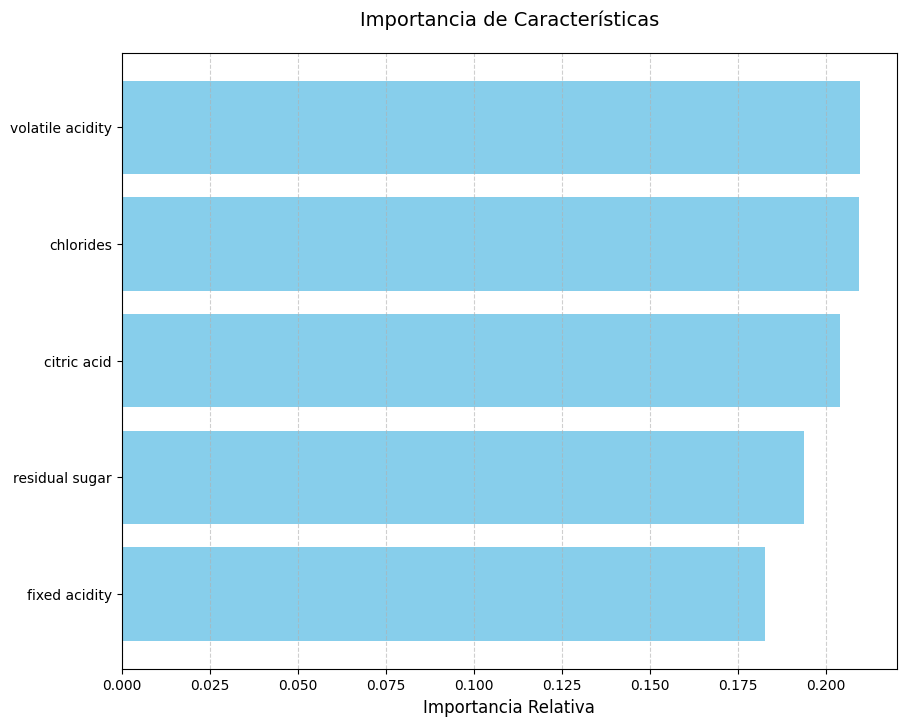

In [67]:
importances = modelo_abc.feature_importances_
feature_names = ['fixed acidity','volatile acidity','citric acid','residual sugar', 
        'chlorides', 'total sulfur dioxide', 'density', 'pH','sulphates','alcohol'] 

# 2. Ordenar características por importancia (de mayor a menor)
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_features = [feature_names[i] for i in indices]

# 3. Crear gráfico de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), sorted_importances, align='center', color='skyblue')
plt.yticks(range(len(importances)), sorted_features)
plt.gca().invert_yaxis()  # Invertir eje Y para mostrar la más importante arriba
plt.xlabel('Importancia Relativa', fontsize=12)
plt.title('Importancia de Características', fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.6)


In [68]:
# Confusion matrix con todos los datos
'''
cm_rf_abc
cm_rf_gs
cm_rf_xgb
cm_rf
cm_lr
'''

y_pred_abc = modelo_abc.predict(X_res)
print("\nMatriz de Confusión:")
print(confusion_matrix(y_res, y_pred_abc)) 
cm_rf_total = confusion_matrix(y_res, y_pred_abc)


Matriz de Confusión:


ValueError: Mix of label input types (string and number)

# GUARDAMOS LOS NUEVOS MODELOS

In [69]:
with open('../models/modelo_abc1.pkl', 'wb') as archivo:  # 'wb' = modo escritura binaria
    pickle.dump(modelo_abc, archivo)

print("Modelo guardado como 'modelo_abc1.pkl'")

Modelo guardado como 'modelo_abc1.pkl'


In [70]:
with open('../models/modelo_rf_gs1.pkl', 'wb') as archivo:  # 'wb' = modo escritura binaria
    pickle.dump(modelo_rf_gs, archivo)

print("Modelo guardado como 'modelo_rf_gs1.pkl'")

Modelo guardado como 'modelo_rf_gs1.pkl'


In [71]:
with open('../models/modelo_xgb1.pkl', 'wb') as archivo:  # 'wb' = modo escritura binaria
    pickle.dump(modelo_xgb, archivo)

print("Modelo guardado como 'modelo_xgb1.pkl'")

Modelo guardado como 'modelo_xgb1.pkl'


In [72]:
with open('../models/modelo_rf1.pkl', 'wb') as archivo:  # 'wb' = modo escritura binaria
    pickle.dump(modelo_rf, archivo)

print("Modelo guardado como 'modelo_rf1.pkl'")

Modelo guardado como 'modelo_rf1.pkl'
